In [101]:
import numpy as np
from matplotlib import pylab as plt
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial.distance import euclidean

plt.rcParams['figure.figsize'] = [15, 5]

### KMean là một thuật toán phân cụm dữ liệu rõ

Thuật tóan giúp ta tìm ra cấu trúc của dữ liệu không gán nhãn, ví dụ như bài toán phân cụm (clustering)

KMeans thực hiện việc gán nhãn cho điểm dữ liệu theo số cụm biết trước

Giả sử $\mu_k: $ tâm của cụm thứ k, trong đó $k \in {1..K}, \mu_{k} \in \mathbb{R}^{n}$ với  K là số cụm

$c^{(i)}: $ nhãn của điểm dữ liệu thứ i, trong đó $c^{i}\in {1..K}$

$\mu_{c^{(i)}}: $ tâm cụm của điểm dữ liệu thứ i

Optimization objective: $$ J\left( c^{(1)}, .., c^{(m)}, \mu_{1}, .., \mu{K} \right) = \dfrac{1}{m}\sum_{i=1}^{m}\left\Vert x^{(i)} - \mu_{c^{(i)}} \right\Vert^{2}$$

Target: $$ min_{c^{(1)}, .., c^{(m)}, \mu_{1}, .., \mu{K}} J\left( c^{(1)}, .., c^{(m)}, \mu_{1}, .., \mu{K} \right)$$


Tóm lại, hàm mất mát trong thuật toán KMeans với k cụm là trung bình bình phương tổng sai khoảng cách từ điểm dữ liệu tới tâm cụm của điểm đó

### Phương pháp tối ưu


### Cài đặt trên python

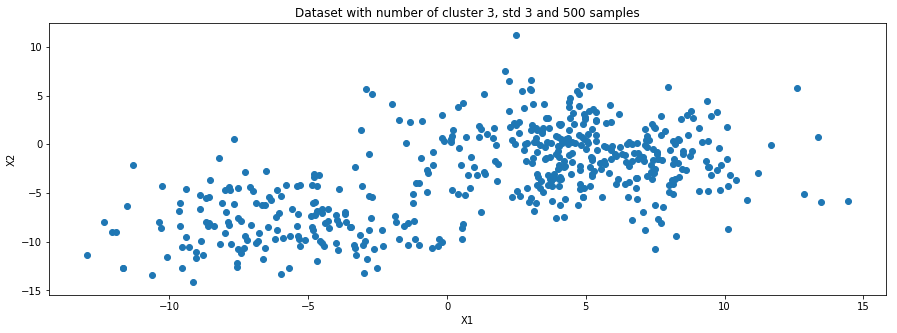

In [125]:
data = make_blobs(n_features=2, centers=3, cluster_std=3, n_samples=500, random_state=None)
data, label = data[0], data[1]
plt.title('Dataset with number of cluster 3, std 3 and 500 samples')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(data[:,0], data[:,1])
plt.show()

In [103]:
def kmeans(data, n_cluster, n_iters=100):
    m, n = data.shape
    idx = np.random.permutation(m)
    data = data[idx]
    
    J_his = []
    c = np.zeros(m)
    mu = np.array(data[:n_cluster], copy=True)
    
    for _ in range(n_iters):
        # assignment class
        loss = 0
        for i, x in enumerate(data):
            d = [euclidean(x, centroid) for centroid in mu]
            c[i] = np.argmin(d)
            loss += d[int(c[i])]
        J_his.append(loss / m)
        
        # move centroids
        buckets = [[] for i in range(n_cluster)]
        for i in range(m):
            buckets[int(c[i])].append(data[i])
            
        for i in range(n_cluster):
            buckets[i] = np.array(buckets[i])
            mu[i] = buckets[i].mean(axis=0)
            
    return mu, J_his, buckets

In [104]:
def plot_cluster(mu, buckets):
    plt.title('Visualization KMeans')
    plt.xlabel('X1')
    plt.ylabel('X2')
    for i in range(3):
        plt.scatter(buckets[i][:,0], buckets[i][:,1], label='Class '+str(i))
        plt.scatter(mu[i][0], mu[i][1], marker='^', s=150, c='red')
    plt.legend()
    plt.show()

In [126]:
mu, J_his, buckets = kmeans(data, 3)

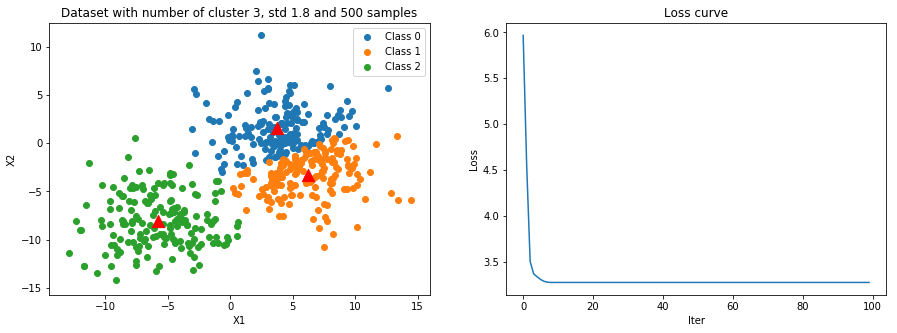

In [127]:
plt.subplot(121)
plt.title('Dataset with number of cluster 3, std 1.8 and 500 samples')
plt.xlabel('X1')
plt.ylabel('X2')
for i in range(3):
    plt.scatter(buckets[i][:,0], buckets[i][:,1], label='Class '+str(i))
    plt.scatter(mu[i][0], mu[i][1], marker='^', s=150, c='red')
plt.legend()
plt.subplot(122)
plt.title('Loss curve')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.plot(list(range(len(J_his))), J_his)
plt.show()

### Lưu ý khi sử dụng KMean

* Ta nên chọn điểm khởi tạo ban đầu cho centroid là các điểm ngẫu nhiên trong tập dữ liệu


* Nên visualization loss để đảm bảo KMean cài đặt đúng


* Nên chọn $K < m$ và sử dụng Elbow method chọn k phù hợp

### Elbow method

In [128]:
data = make_blobs(n_features=2, centers=6, cluster_std=2.5, n_samples=600, random_state=None)
data, label = data[0], data[1]

J_i = []
mu_i = []
buckets_i = []

In [129]:
for cluster in range(2, 7):
    mu, J_his, buckets = kmeans(data, cluster)
    J_i.append(J_his[-1])
    mu_i.append(mu)
    buckets_i.append(buckets)

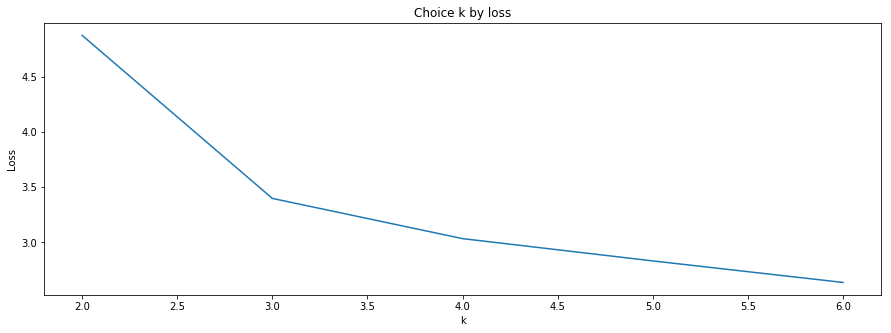

In [130]:
plt.title('Choice k by loss')
plt.xlabel('k')
plt.ylabel('Loss')
plt.plot([i+2 for i in range(len(J_i))], J_i)
plt.show()

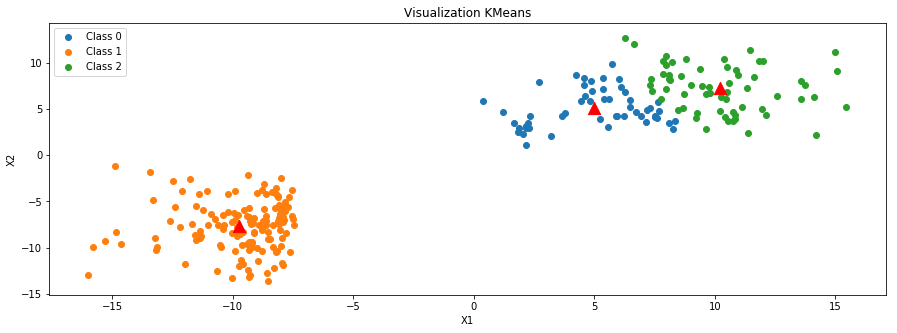

In [131]:
plot_cluster(mu_i[-1], buckets_i[-1])